# SpaceRocks

### Vectorized coordinate transformation and ephemeris calculation with robust unit handling.

To install, simply `pip install spacerocks`

In [1]:
from spacerocks import SpaceRock
import numpy as np

You can also pass in just a single object or an array of objects. I'll try BP519. Here I've turned on precision. This involves a non-vectorized solution to Kepler's equation to calculate the eccentric anomaly, and a topocentric correction to the Earth's position. Right now, only DECam is supported, but I'm working on implementing an obscode feature.

In [2]:
BP = SpaceRock(a=4.487673062316562E+02, 
               e=9.214543710796702E-01, 
               inc=5.411068217470999E+01, 
               arg=3.480587931444684E+02, 
               node=1.352131434907198E+02, 
               epoch=2.473015776611103E+06, 
               tau=2458982.5,
               H=4.5, 
               name='BP',
               precise=True,
               input_coordinates='keplerian',
               input_frame='barycentric',
               input_angles='degrees')

In [3]:
in_data, out_data = BP.propagate(np.array([2458981.5, 2458983.5]))

In [4]:
BP.pandas_df()

,name,a,e,inc,arg,node,varpi,epoch,M,tau,...,vz,ra,dec,delta,ltt,phase_angle,elong,r,H,mag
0,BP,448.767310,0.921454,0.94441,6.074772,2.359915,2.151501,2.473016e+06,6.257774,2458981.5,...,0.001769,1.191740,-0.546574,52.016791,0.000823,0.015611,0.921327,51.413602,4.5,21.636108
1,BP,448.767303,0.921454,0.94441,6.074772,2.359915,2.151501,2.473016e+06,6.257777,2458983.5,...,0.001770,1.192571,-0.546309,52.015771,0.000822,0.015579,0.918266,51.409983,4.5,21.635912


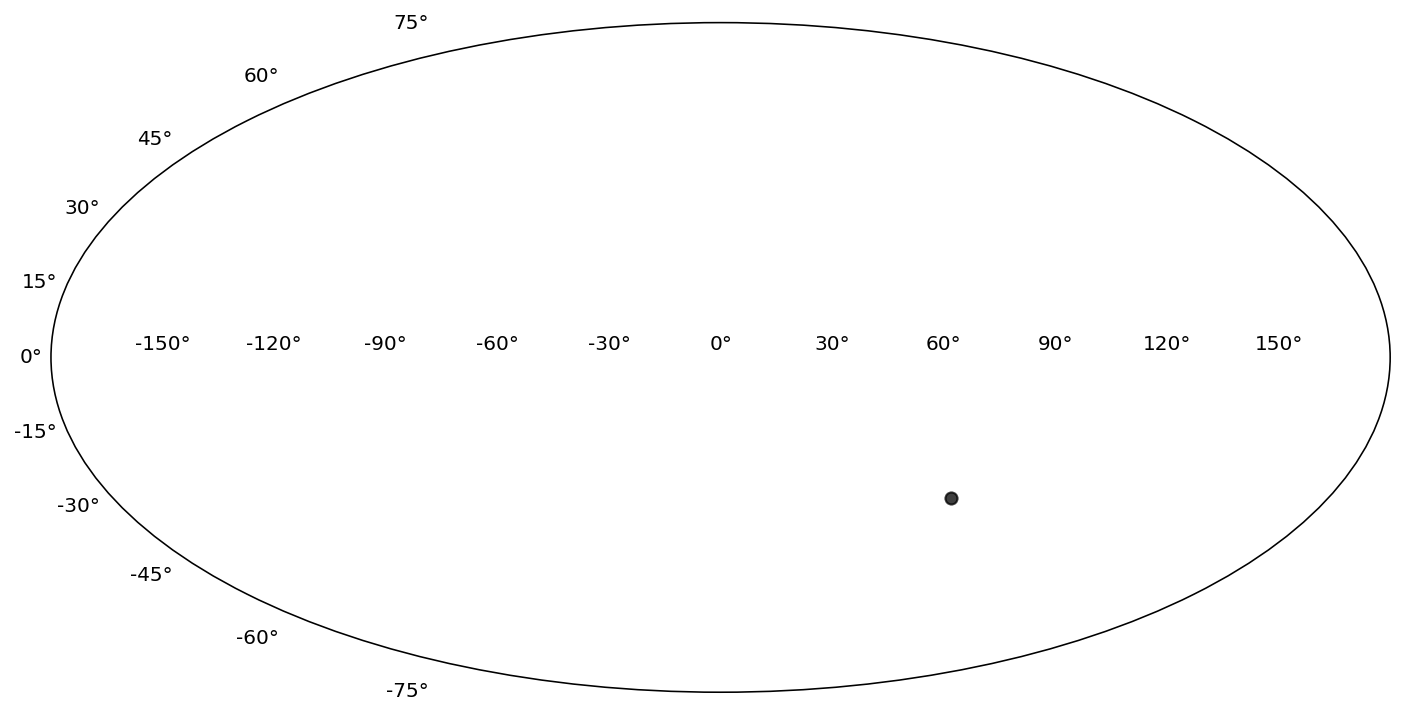

In [5]:
BP.plot_radec()

In [ ]:
# Heliocentric:
# $$SOE
# 2458982.500000000 = A.D. 2020-May-13 00:00:00.0000 TDB 
#  EC= 9.185882992879753E-01 QR= 3.523356471548343E+01 IN= 5.413121974184833E+01
#  OM= 1.350508167296842E+02 W = 3.482436748740575E+02 Tp=  2473051.139603628777
#  N = 1.094710888927695E-04 MA= 3.584598907033508E+02 TA= 2.900481869338853E+02
#  A = 4.327825657409375E+02 AD= 8.303315667663916E+02 PR= 3.288539500622232E+06
#  
# $$SOE
# 2458982.500000000, A.D. 2020-May-13 00:00:00.0000,  
# X=1.581128776843651E+01,  
# Y=2.633376991276546E+01, 
# Z=-4.122491761199618E+01, 
# VX=-2.646197309780768E-03,  
# VY=8.339351467639426E-04,  
# VZ=1.769284602526467E-03
#  
# Barycentric:
# 2458982.500000000 = A.D. 2020-May-13 00:00:00.0000 TDB 
#  EC= 9.214543710796702E-01 QR= 3.524871030684755E+01 IN= 5.411068217470999E+01
#  OM= 1.352131434907198E+02 W = 3.480587931444684E+02 Tp=  2473015.776611103211
#  N = 1.037441078395607E-04 MA= 3.585441302379153E+02 TA= 2.901471338857519E+02
#  A = 4.487673062316562E+02 AD= 8.622859021564648E+02 PR= 3.470076590342235E+06
#  
# $$SOE
# 2458982.500000000, A.D. 2020-May-13 00:00:00.0000,  
# X=1.580639409220872E+01,  
# Y=2.634085915326679E+01, 
# Z=-4.122486401689469E+01, 
# VX=-2.654346366438451E-03,  
# VY=8.305911427892275E-04,  
# VZ=1.769516671619466E-03

# Geocentric
#Date__(UT)__HR:MN     R.A._____(ICRF)_____DEC  APmag            delta      deldot    S-O-T /r    S-T-O
#2020-May-12 00:00     04 33 07.61 -31 18 58.9  21.78 52.0167906889203  -0.5927296  52.7826 /T   0.8969
#2020-May-13 00:00     04 33 13.31 -31 18 31.2  21.78 52.0163645443357  -0.8830999  52.6951 /T   0.8961
#2020-May-14 00:00     04 33 19.04 -31 18 04.3  21.78 52.0157704551808  -1.1742870  52.6191 /T   0.8954